# Sentiment Analysis of Movie reviews

## Import libraies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords') # If it needs to do it.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import pickle

## Movie reviews data set

In [2]:
df = pd.read_csv('IMDB_Dataset.csv') # data download link: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/download

df.head()

df = df.sample(20000) # Taking 20000 random samples from dataset

## Data preprocessing

### Use one hot encoding to convert label into 0 and 1

In [3]:
df = pd.get_dummies(df, columns=['sentiment'], drop_first=True)

df.head()

,review,sentiment_positive
10343,this movie scared the hell out of me for no go...,0
14390,The movie uses random events of historical sig...,0
74,"Upon viewing Tobe Hooper's gem, Crocodile, in ...",0
16749,boring stuff we got here. His 5 minute shorts ...,0
30589,"Fairly good movie, but not a true story.<br />...",0


### Removing tags from data

In [4]:
tag_remove = lambda x: re.sub(re.compile('<.*?>'),'',x)

In [5]:
df['review']=df['review'].apply(tag_remove)
df.head()

,review,sentiment_positive
10343,this movie scared the hell out of me for no go...,0
14390,The movie uses random events of historical sig...,0
74,"Upon viewing Tobe Hooper's gem, Crocodile, in ...",0
16749,boring stuff we got here. His 5 minute shorts ...,0
30589,"Fairly good movie, but not a true story.Rubin ...",0


### Removing special charecters from data

In [6]:
special_chr_remove = lambda x: re.sub(r'\W+,. ', ' ', x) 

In [7]:
df['review']=df['review'].apply(special_chr_remove)
df.head()

,review,sentiment_positive
10343,this movie scared the hell out of me for no go...,0
14390,The movie uses random events of historical sig...,0
74,"Upon viewing Tobe Hooper's gem, Crocodile, in ...",0
16749,boring stuff we got here. His 5 minute shorts ...,0
30589,"Fairly good movie, but not a true story.Rubin ...",0


### Convert all characters in dataset into lowercase

In [8]:
convert_to_lower = lambda x: x.lower()

In [9]:
df['review']=df['review'].apply(convert_to_lower)
df.head()

,review,sentiment_positive
10343,this movie scared the hell out of me for no go...,0
14390,the movie uses random events of historical sig...,0
74,"upon viewing tobe hooper's gem, crocodile, in ...",0
16749,boring stuff we got here. his 5 minute shorts ...,0
30589,"fairly good movie, but not a true story.rubin ...",0


### Remove punctuation from dataset

In [10]:
remove_punctuation = lambda x: re.sub(r'[^\w\s]', ' ',x)

In [11]:
df['review']=df['review'].apply(remove_punctuation)
df.head()

,review,sentiment_positive
10343,this movie scared the hell out of me for no go...,0
14390,the movie uses random events of historical sig...,0
74,upon viewing tobe hooper s gem crocodile in ...,0
16749,boring stuff we got here his 5 minute shorts ...,0
30589,fairly good movie but not a true story rubin ...,0


### Remove Stop words

In [12]:
stop = stopwords.words('english')
remove_stopwords = lambda x: ' '.join([word for word in x.split() if word not in (stop)])

In [13]:
df['review']=df['review'].apply(remove_stopwords)
df.head()

,review,sentiment_positive
10343,movie scared hell good reason eerie music well...,0
14390,movie uses random events historical significan...,0
74,upon viewing tobe hooper gem crocodile 2000 de...,0
16749,boring stuff got 5 minute shorts better know 5...,0
30589,fairly good movie true story rubin hurricane c...,0


In [14]:
stemmer= nltk.stem.SnowballStemmer('english') # Stemming

In [15]:
stem_words = lambda x: ' '.join([stemmer.stem(word) for word in x.split()])

In [17]:
df['review']=df['review'].apply(stem_words)
df.head()

,review,sentiment_positive
10343,movi scare hell good reason eeri music well wr...,0
14390,movi use random event histor signific backdrop...,0
74,upon view tobe hooper gem crocodil 2000 develo...,0
16749,bore stuff got 5 minut short better know 5 min...,0
30589,fair good movi true stori rubin hurrican carte...,0


In [18]:
df.to_csv('Processed_IMDB_Dataset.csv')

### Transforming features into vectors

In [20]:
df2 = pd.read_csv('Processed_IMDB_Dataset.csv')

In [21]:
count_vec = CountVectorizer(max_features=500)
X = count_vec.fit_transform(df2['review']).toarray() # transforming feature
X.shape

(20000, 500)

In [22]:
y = df2.iloc[:,-1].values # Labels
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## Trainning and Testing our model using Naive Bayes classifier

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=486) # Splitting our data into training snd testing data.

In [24]:
X_train.shape

(16000, 500)

In [22]:
g_NB = GaussianNB()
m_NB = MultinomialNB()
b_NB = BernoulliNB()

In [23]:
# Fitting our data into Naive Bayes classifier
g_NB.fit(X_train,y_train)
m_NB.fit(X_train,y_train)
b_NB.fit(X_train,y_train)

BernoulliNB()

In [24]:
# Predict from our trained model
y_g_NB_pred = g_NB.predict(X_test)
y_m_NB_pred = m_NB.predict(X_test)
y_b_NB_pred = b_NB.predict(X_test)

In [25]:
print(f"The accuracy score of Gaussian Naive Bayes is: {accuracy_score(y_test,y_g_NB_pred)}")
print(f"The accuracy score of Multinomial Naive Bayes is: {accuracy_score(y_test,y_m_NB_pred)}")
print(f"The accuracy score of Bernoulli Naive Bayes is: {accuracy_score(y_test,y_b_NB_pred)}")

The accuracy score of Gaussian Naive Bayes is: 0.803
The accuracy score of Multinomial Naive Bayes is: 0.82175
The accuracy score of Bernoulli Naive Bayes is: 0.81475


### Graphical comparison of accuracy 

<AxesSubplot:>

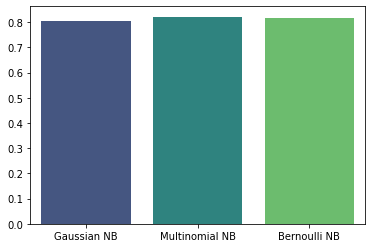

In [26]:
sns.barplot(x=['Gaussian NB','Multinomial NB','Bernoulli NB'],
            y=[accuracy_score(y_test,y_g_NB_pred),accuracy_score(y_test,y_m_NB_pred),accuracy_score(y_test,y_b_NB_pred)],palette='viridis')

In [27]:
# The accuracy score of Multinomial Naive Bayes is: 0.82175 which is highest. we will save this model to a pickle file
with  open('naive_bayes_model.pickle','wb') as f:
    pickle.dump(m_NB,f)

## Using artificial neural network

In [29]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

### Training model

In [31]:
ann_model=Sequential()
ann_model.add( Dense(8, activation="relu", input_shape = (X.shape[1],) ) )
ann_model.add( Dense(8, activation="relu") )
ann_model.add( Dense(4, activation="relu") )
ann_model.add( Dense(2, activation="relu") )
ann_model.add( Dense(1, activation="sigmoid"))

ann_model.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

In [32]:
# validation set
X_val=X[:1000]
y_val=y[:1000]

In [33]:
X_val.shape

(1000, 500)

In [34]:
y_val.shape

(1000,)

In [35]:
result = ann_model.fit(X, y, batch_size=10, epochs=100, validation_data=(X_val, y_val),verbose=1)

Epoch 1/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.5757 - accuracy: 0.7099 - val_loss: 0.3665 - val_accuracy: 0.8600
Epoch 2/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.4031 - accuracy: 0.8396 - val_loss: 0.3235 - val_accuracy: 0.8720
Epoch 3/100
2000/2000 [==============================] - 11s 6ms/step - loss: 0.3743 - accuracy: 0.8481 - val_loss: 0.2982 - val_accuracy: 0.8820
Epoch 4/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.3562 - accuracy: 0.8532 - val_loss: 0.2915 - val_accuracy: 0.8830
Epoch 5/100
2000/2000 [==============================] - 11s 6ms/step - loss: 0.3513 - accuracy: 0.8538 - val_loss: 0.2732 - val_accuracy: 0.8830
Epoch 6/100
2000/2000 [==============================] - 11s 6ms/step - loss: 0.3280 - accuracy: 0.8656 - val_loss: 0.2718 - val_accuracy: 0.8940
Epoch 7/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.3053 - accuracy: 0.8745 - val_loss: 0.2610 -

In [36]:
ann_model.evaluate(X_val, y_val)

32/32 [==============================] - 0s 6ms/step - loss: 0.1170 - accuracy: 0.9640


[0.11703848093748093, 0.9639999866485596]

In [38]:
# This ANN model has 96.39 % accuracy ans we have to save our model
ann_model.save('ann_model',save_format="h5") 
# To load model -> 1. import tensorflow.kers.models import load_model  2. model = load_model("ann_model_model")